In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [34]:
# Load the data heart_disease.csv
data = pd.read_csv('heart_disease.csv')

In [35]:
# Preprocessing: Handle missing values, encode categorical columns
target_column = 'Heart Disease Status'

In [36]:
# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [37]:
# Encode categorical columns using LabelEncoder
categorical_columns = data.select_dtypes(include=[object]).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col != target_column: 
        data[col] = label_encoder.fit_transform(data[col])

In [38]:
# Define features and target
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Yes' else 0) 

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\mukesh choudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [41]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TP, FP, FN, TN = cm.ravel()

In [43]:
# Calculate metrics
TPR = TP / (TP + FN)  # Recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (FN + TP)
Precision = TP / (TP + FP)
Recall = TPR
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

C:\Users\mukesh choudhary\AppData\Local\Temp\ipykernel_1704\3692680952.py:3: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP / (FP + TN)
C:\Users\mukesh choudhary\AppData\Local\Temp\ipykernel_1704\3692680952.py:4: RuntimeWarning: invalid value encountered in scalar divide
  TNR = TN / (TN + FP)


In [44]:
# Print metrics
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2411    0]
 [ 589    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2411
           1       0.00      0.00      0.00       589

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\mukesh choudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mukesh choudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mukesh choudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packa

In [45]:
print("\nPerformance Metrics:")
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"Recall (Sensitivity): {Recall:.2f}")
print(f"F1 Score: {F1_Score:.2f}")


Performance Metrics:
True Positive Rate (TPR): 0.80
False Positive Rate (FPR): nan
True Negative Rate (TNR): nan
False Negative Rate (FNR): 0.20
Precision: 1.00
Recall (Sensitivity): 0.80
F1 Score: 0.89


In [46]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

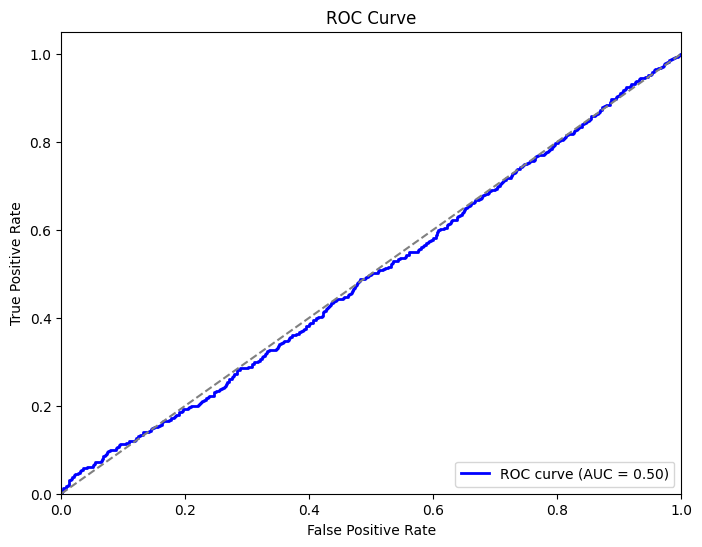

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
# AUC Score
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 0.50
